In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate
from PIL import Image, ImageDraw, ImageFont

In [ ]:
# Membaca dataset
data = pd.read_csv('/content/insurance.csv')

In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


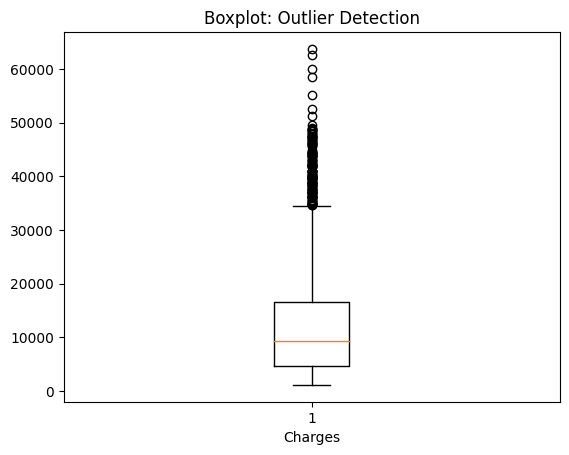

In [ ]:
# Boxplot untuk mengecek outlier
plt.boxplot(data['charges'])
plt.xlabel('Charges')
plt.title('Boxplot: Outlier Detection')
plt.show()

In [ ]:
# Mengecek missing value
missing_values = data.isnull().sum()
print("Jumlah missing value:")
print(missing_values)

# Mendeteksi duplikat
duplicated_rows = data.duplicated()
print("Jumlah duplikat:", duplicated_rows.sum())

Jumlah missing value:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Jumlah duplikat: 1


##### Analisa Descriptive Statistic

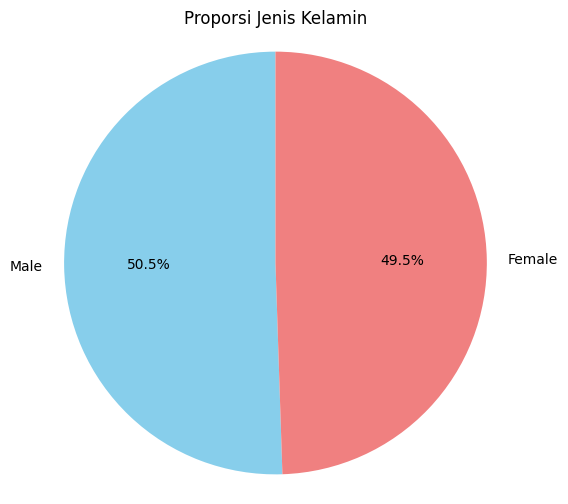

In [46]:
# Menghitung jumlah data berdasarkan jenis kelamin
male_count = len(data[data['sex'] == 'male'])
female_count = len(data[data['sex'] == 'female'])

# Menyiapkan label dan nilai untuk pie chart
labels = ['Male', 'Female']
values = [male_count, female_count]

# Menentukan warna untuk setiap bagian pie chart
colors = ['skyblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Jenis Kelamin')
plt.axis('equal')

# Menampilkan pie chart
plt.show()


Rata-rata umur: 39
18
64


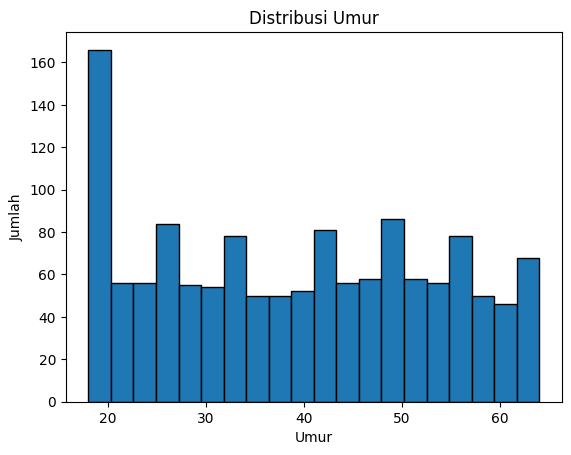

In [35]:
# 1. Rata-rata umur
rata_umur = data['age'].mean()
print("Rata-rata umur:", int(rata_umur))
print(min(data['age']))
print(max(data['age']))
# Visualisasi distribusi umur
plt.hist(data['age'], bins=20, edgecolor='k')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.title('Distribusi Umur')
plt.show()

Rata-rata BMI perokok: 30.70844890510949
Rata-rata BMI non-perokok: 30.651795112781954



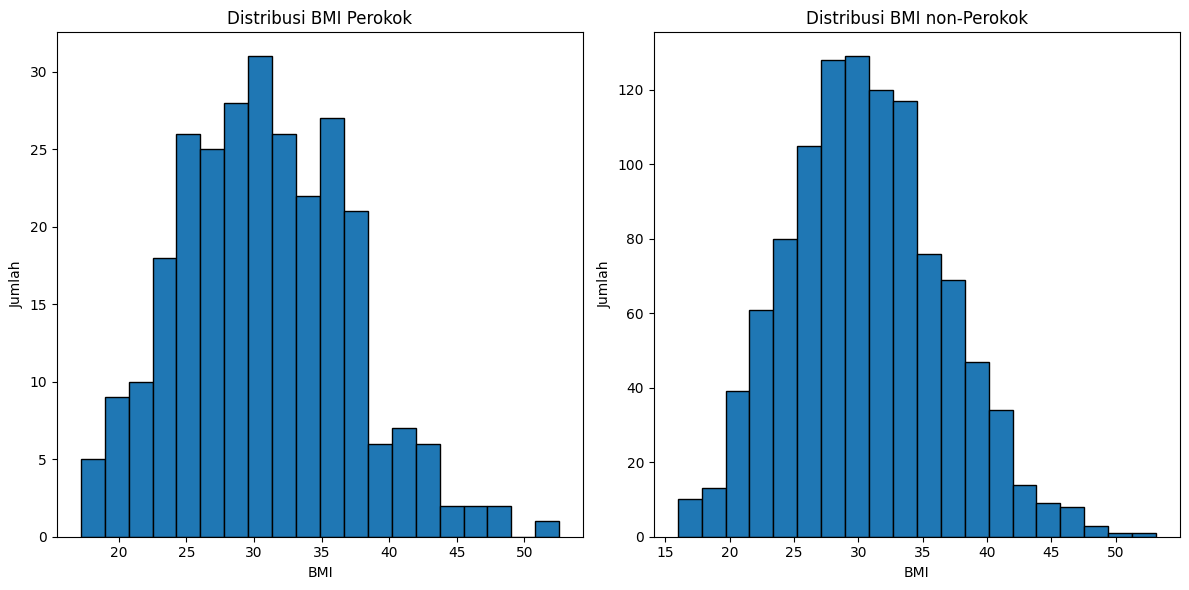

In [45]:
# 2. Rata-rata BMI perokok dan non-perokok
rata_bmi_perokok = data[data['smoker'] == 'yes']['bmi'].mean()
rata_bmi_non_perokok = data[data['smoker'] == 'no']['bmi'].mean()
print("Rata-rata BMI perokok:", rata_bmi_perokok)
print("Rata-rata BMI non-perokok:", rata_bmi_non_perokok)
print()
# Membuat grid atau bersampingan
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram BMI perokok
axs[0].hist(data[data['smoker'] == 'yes']['bmi'], bins=20, edgecolor='k')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Jumlah')
axs[0].set_title('Distribusi BMI Perokok')

# Plot histogram BMI non-perokok
axs[1].hist(data[data['smoker'] == 'no']['bmi'], bins=20, edgecolor='k')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Jumlah')
axs[1].set_title('Distribusi BMI non-Perokok')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# 3. Variansi tagihan kesehatan perokok dan non-perokok
variansi_perokok = data[data['smoker'] == 'yes']['charges'].var()
variansi_non_perokok = data[data['smoker'] == 'no']['charges'].var()
print("Variansi tagihan kesehatan perokok:", variansi_perokok)
print("Variansi tagihan kesehatan non-perokok:", variansi_non_perokok)

Variansi tagihan kesehatan perokok: 133207311.20634924
Variansi tagihan kesehatan non-perokok: 35925420.496111736


Rata-rata umur perempuan yang merokok:  38
Rata-rata umur laki-laki yang merokok:  38


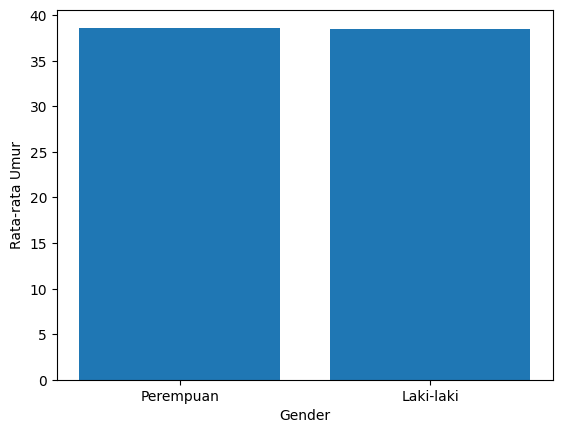

In [ ]:
# 4. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?
rata_umur_perempuan = data[(data['sex'] == 'female') & (data['smoker'] == 'yes')]['age'].mean()
rata_umur_laki_laki = data[(data['sex'] == 'male') & (data['smoker'] == 'yes')]['age'].mean()
print("Rata-rata umur perempuan yang merokok: ", int(rata_umur_perempuan))
print("Rata-rata umur laki-laki yang merokok: ", int(rata_umur_laki_laki))

# Visualisasi rata-rata umur perempuan dan laki-laki yang merokok
plt.bar(['Perempuan', 'Laki-laki'], [rata_umur_perempuan, rata_umur_laki_laki])
plt.xlabel('Gender')
plt.ylabel('Rata-rata Umur')
plt.show()

Rata-rata tagihan perokok: $32050.23
Rata-rata tagihan non perokok: $8434.27
Rata-rata tagihan kesehatan perokok lebih tinggi


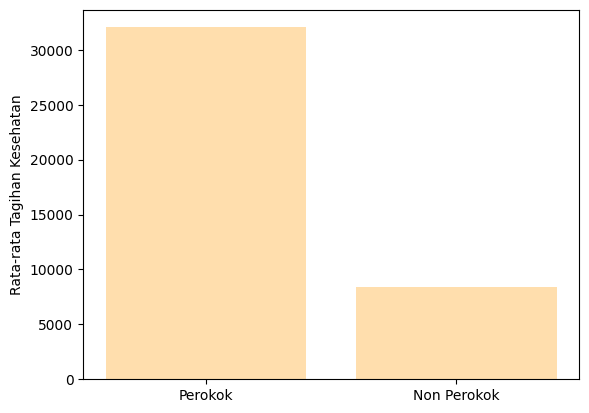

In [39]:
# 5. Rata-rata tagihan kesehatan perokok vs non-perokok
rata_tagihan_perokok = data[data['smoker'] == 'yes']['charges'].mean()
rata_tagihan_non_perokok = data[data['smoker'] == 'no']['charges'].mean()

print(f"Rata-rata tagihan perokok: ${rata_tagihan_perokok:.2f}")
print(f"Rata-rata tagihan non perokok: ${rata_tagihan_non_perokok:.2f}")

if rata_tagihan_perokok > rata_tagihan_non_perokok:
    print("Rata-rata tagihan kesehatan perokok lebih tinggi")
else:
    print("Rata-rata tagihan kesehatan non-perokok lebih tinggi")

# Visualisasi rata-rata tagihan kesehatan perokok vs non-perokok
plt.bar(['Perokok', 'Non Perokok'], [rata_tagihan_perokok, rata_tagihan_non_perokok], color = 'navajowhite')
plt.ylabel('Rata-rata Tagihan Kesehatan')
plt.show()

35116.90965694064
8629.589609712157



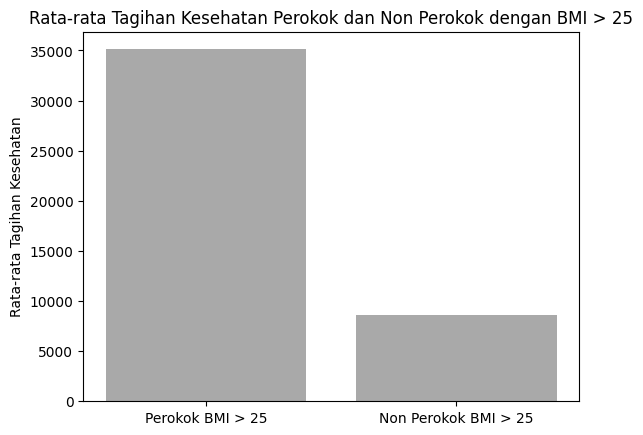

In [51]:
# 6. Rata-rata tagihan kesehatan perokok BMI > 25 vs non-perokok BMI > 25
rata_tagihan_perokok_bmi_25 = data[(data['smoker'] == 'yes') & (data['bmi'] >= 25)]['charges'].mean()
rata_tagihan_non_perokok_bmi_25 = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]['charges'].mean()

print(rata_tagihan_perokok_bmi_25)
print(rata_tagihan_non_perokok_bmi_25)
print()

# Visualisasi rata-rata tagihan kesehatan perokok dengan BMI > 25 vs non-perokok dengan BMI > 25
plt.bar(['Perokok BMI > 25', 'Non Perokok BMI > 25'], [rata_tagihan_perokok_bmi_25, rata_tagihan_non_perokok_bmi_25], color = 'darkgray')
plt.ylabel('Rata-rata Tagihan Kesehatan')
plt.title('Rata-rata Tagihan Kesehatan Perokok dan Non Perokok dengan BMI > 25')
plt.show()

##### Analisa Peluang pada Variabel Diskrit

Gender dengan tagihan paling tinggi: male


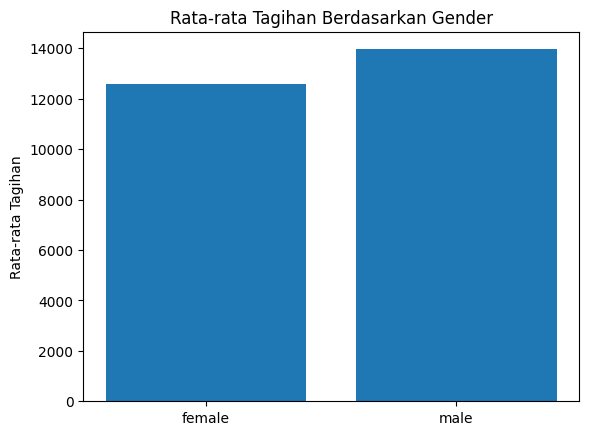

In [52]:
# 1. Gender mana yang memiliki tagihan paling tinggi?
tagihan_tertinggi = data.groupby('sex')['charges'].mean()
gender_tagihan_tertinggi = tagihan_tertinggi.idxmax()
print("Gender dengan tagihan paling tinggi:", gender_tagihan_tertinggi)

# Visualisasi rata-rata tagihan berdasarkan gender
plt.bar(tagihan_tertinggi.index, tagihan_tertinggi.values)
plt.ylabel('Rata-rata Tagihan')
plt.title('Rata-rata Tagihan Berdasarkan Gender')
plt.show()

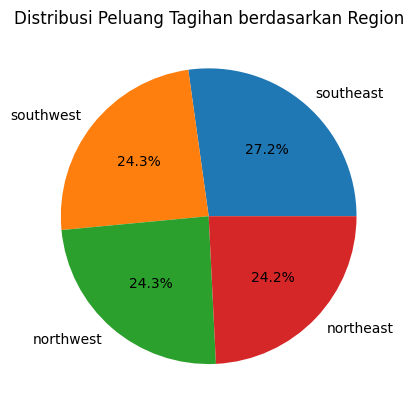

In [ ]:
# 2. Distribusi peluang tagihan di tiap-tiap region
region_counts = data['region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Peluang Tagihan berdasarkan Region')
plt.show()

In [61]:
# 3. Proporsi data di setiap region
proporsi_region = data['region'].value_counts(normalize=True)

# Membuat DataFrame dari proporsi region
df_proporsi_region = pd.DataFrame(proporsi_region)

# Mengatur nama kolom pada DataFrame
df_proporsi_region.columns = ['Proporsi']

# Membuat tabel dalam bentuk string
tabel = tabulate(df_proporsi_region, headers='keys', tablefmt='pipe')

# Menampilkan tabel
print("Proporsi data di setiap region:")
print(tabel)

Proporsi data di setiap region:
|           |   Proporsi |
|:----------|-----------:|
| southeast |   0.272048 |
| southwest |   0.2429   |
| northwest |   0.2429   |
| northeast |   0.242152 |


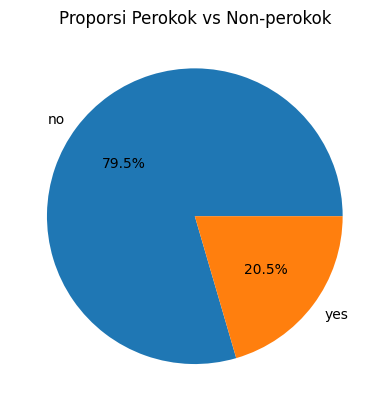

In [ ]:
# 4. Proporsi perokok vs non-perokok
proporsi_smoker = data['smoker'].value_counts(normalize=True)
plt.pie(proporsi_smoker, labels=proporsi_smoker.index, autopct='%1.1f%%')
plt.title('Proporsi Perokok vs Non-perokok')
plt.show()

In [ ]:
# 5. Peluang seseorang adalah perempuan jika dia adalah perokok
peluang_perempuan_perokok = data[data['smoker'] == 'yes']['sex'].value_counts(normalize=True)['female']
print("Peluang seseorang adalah perempuan jika dia adalah perokok:", peluang_perempuan_perokok)

Peluang seseorang adalah perempuan jika dia adalah perokok: 0.4197080291970803


In [ ]:
# 6. Peluang seseorang adalah laki-laki jika dia adalah perokok
peluang_laki_laki_perokok = data[data['smoker'] == 'yes']['sex'].value_counts(normalize=True)['male']
print("Peluang seseorang adalah laki-laki jika dia adalah perokok:", peluang_laki_laki_perokok)

Peluang seseorang adalah laki-laki jika dia adalah perokok: 0.5802919708029197


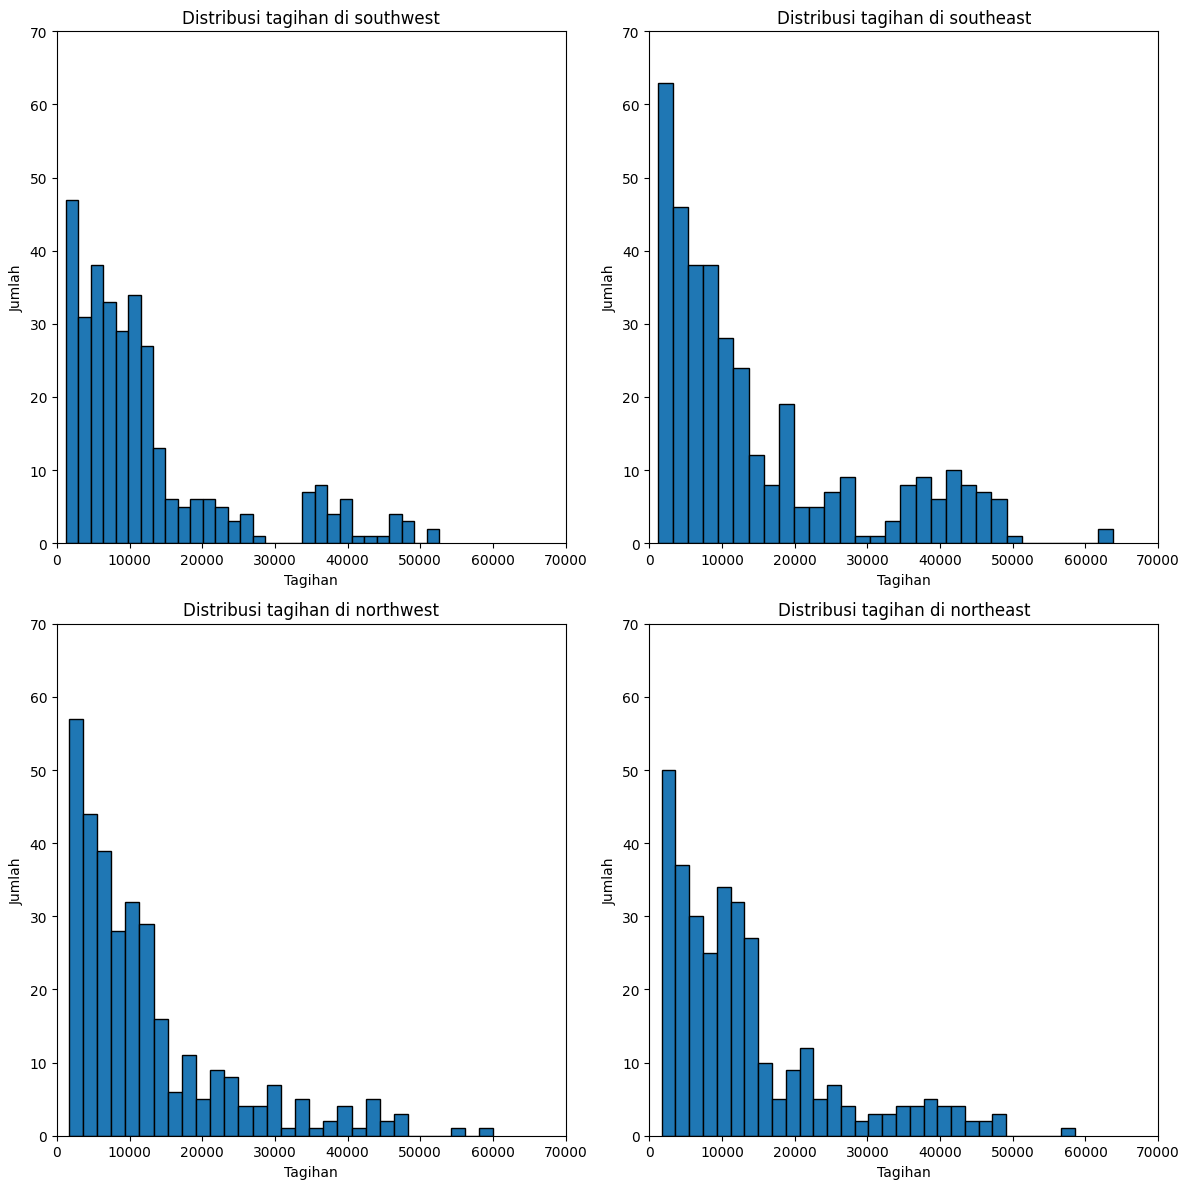

In [66]:
# 7. Distribusi peluang besar tagihan dari tiap-tiap region
regions = data['region'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, region in enumerate(regions):
    row = i // 2
    col = i % 2

    axs[row, col].hist(data[data['region'] == region]['charges'], bins=30, edgecolor='k')
    axs[row, col].set_xlabel('Tagihan')
    axs[row, col].set_ylabel('Jumlah')
    axs[row, col].set_title('Distribusi tagihan di {}'.format(region))

    axs[row, col].set_xlim([0, 70000])
    axs[row, col].set_ylim([0, 70])

plt.tight_layout()
plt.show()

In [67]:
for region in regions:
    charges = data[data['region'] == region]['charges']
    mean = np.mean(charges)
    median = np.median(charges)
    std_dev = np.std(charges)

    print('Region:', region)
    print('Mean:', mean)
    print('Median:', median)
    print('Standard Deviation:', std_dev)
    print()

Region: southwest
Mean: 12346.937377292308
Median: 8798.593
Standard Deviation: 11539.38512699184

Region: southeast
Mean: 14735.411437609888
Median: 9294.131949999999
Standard Deviation: 13951.894320685302

Region: northwest
Mean: 12417.57537396923
Median: 8965.79575
Standard Deviation: 11055.229531899642

Region: northeast
Mean: 13406.384516385804
Median: 10057.652025
Standard Deviation: 11238.419575566815



##### Analisa Variabel Kontinu

0.21150971599402094
0.03811659192825112
Mana yang lebih mungkin terjadi:
a. Seseorang dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k


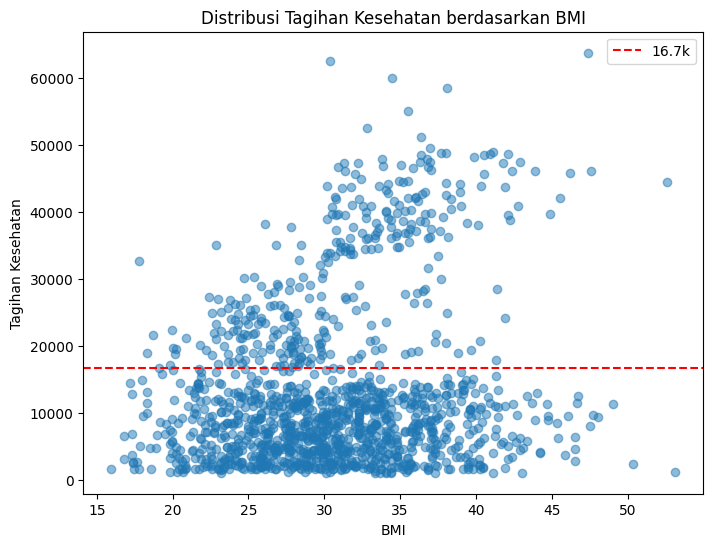

In [68]:
# 1. Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, atau
#    seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k

# Menghitung peluang untuk setiap kondisi
peluang_a = len(data[(data['bmi'] > 25) & (data['charges'] > 16700)]) / len(data)
peluang_b = len(data[(data['bmi'] < 25) & (data['charges'] > 16700)]) / len(data)

print(peluang_a)
print(peluang_b)

# Membandingkan peluang
if peluang_a > peluang_b:
    hasil = "a. Seseorang dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k"
else:
    hasil = "b. Seseorang dengan BMI di bawah 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k"

print("Mana yang lebih mungkin terjadi:")
print(hasil)

# Visualisasi distribusi tagihan berdasarkan BMI
plt.figure(figsize=(8, 6))
plt.scatter(data['bmi'], data['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Tagihan Kesehatan')
plt.title('Distribusi Tagihan Kesehatan berdasarkan BMI')
plt.axhline(y=16700, color='r', linestyle='--', label='16.7k')
plt.legend()
plt.show()

0.16068759342301944
0.05082212257100149
Mana yang lebih mungkin terjadi:
a. Seseorang perokok dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k


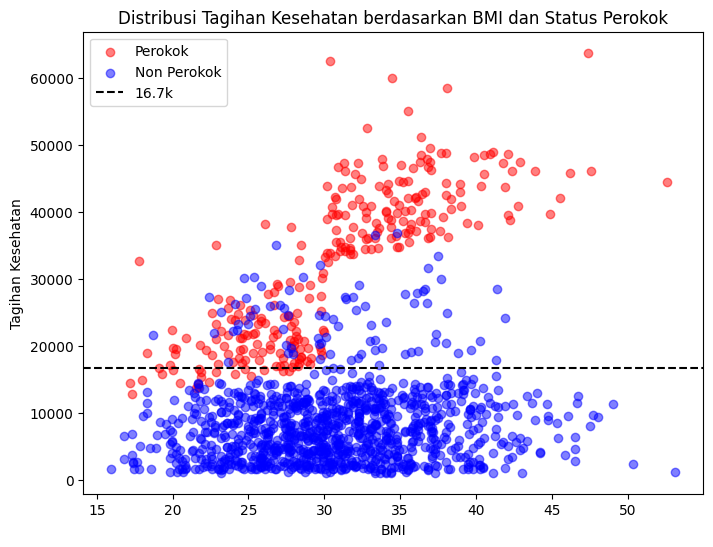

In [69]:
# 2. Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, atau
#    seseorang non perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k

# Menghitung peluang untuk setiap kondisi
peluang_a = len(data[(data['smoker'] == 'yes') & (data['bmi'] > 25) & (data['charges'] > 16700)]) / len(data)
peluang_b = len(data[(data['smoker'] == 'no') & (data['bmi'] > 25) & (data['charges'] > 16700)]) / len(data)

print(peluang_a)
print(peluang_b)

# Membandingkan peluang
if peluang_a > peluang_b:
    hasil = "a. Seseorang perokok dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k"
else:
    hasil = "b. Seseorang non perokok dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k"

print("Mana yang lebih mungkin terjadi:")
print(hasil)

# Visualisasi distribusi tagihan berdasarkan BMI dan status perokok
plt.figure(figsize=(8, 6))
plt.scatter(data[data['smoker'] == 'yes']['bmi'], data[data['smoker'] == 'yes']['charges'], color='r', alpha=0.5, label='Perokok')
plt.scatter(data[data['smoker'] == 'no']['bmi'], data[data['smoker'] == 'no']['charges'], color='b', alpha=0.5, label='Non Perokok')
plt.xlabel('BMI')
plt.ylabel('Tagihan Kesehatan')
plt.title('Distribusi Tagihan Kesehatan berdasarkan BMI dan Status Perokok')
plt.axhline(y=16700, color='black', linestyle='--', label='16.7k')
plt.legend()
plt.show()

##### Analisa Korelasi Variabel

Matriks Korelasi Numerik:
           charges       bmi  children       age
charges   1.000000  0.198341  0.067998  0.299008
bmi       0.198341  1.000000  0.012759  0.109272
children  0.067998  0.012759  1.000000  0.042469
age       0.299008  0.109272  0.042469  1.000000


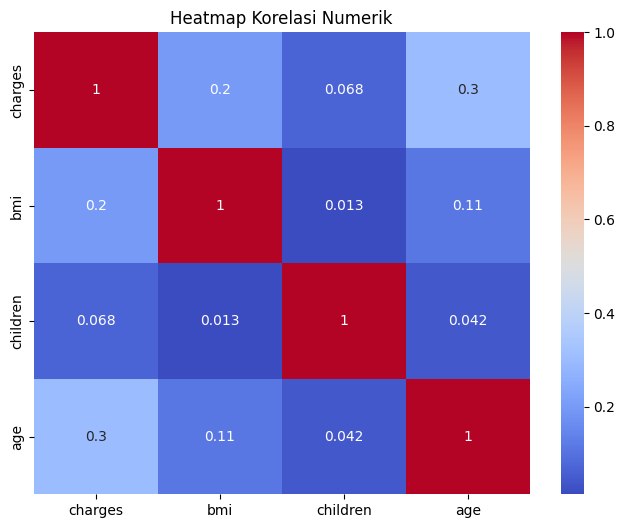

In [ ]:
variabel_1 = 'bmi'
variabel_2 = 'smoker'
variabel_3 = 'children'
variabel_4 = 'region'
variabel_5 = 'sex'
variabel_6 = 'age'

# Menghitung korelasi menggunakan metode Pearson untuk variabel numerik
korelasi_numerik = data[['charges', variabel_1, variabel_3, variabel_6]].corr()

# Menampilkan matriks korelasi numerik
print("Matriks Korelasi Numerik:")
print(korelasi_numerik)

# Menampilkan heatmap korelasi numerik
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi_numerik, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Numerik')
plt.show()

In [ ]:
# Menghitung uji ANOVA antara variabel kategorikal dan variabel numerik
variabel_kategorikal = [variabel_2, variabel_4, variabel_5]
hasil_anova = {}

for variable in variabel_kategorikal:
    groups = data.groupby(variable)['charges'].apply(list)
    f_statistic, p_value = stats.f_oneway(*groups)
    hasil_anova[variable] = p_value

# Menampilkan hasil uji ANOVA
print("Hasil Uji ANOVA:")
for variable, p_value in hasil_anova.items():
    print(variable, ": ", p_value)

Hasil Uji ANOVA:
smoker :  8.271435842182967e-283
region :  0.0308933560705201
sex :  0.03613272100596256


##### Pengujian Hipotesis

Hasil Uji T-Test:
Nilai p-value: 8.271435842179102e-283


<ipython-input-28-e75b25fc6826>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tagihan_perokok, shade=True, label='Perokok')
<ipython-input-28-e75b25fc6826>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tagihan_nonperokok, shade=True, label='Non Perokok')


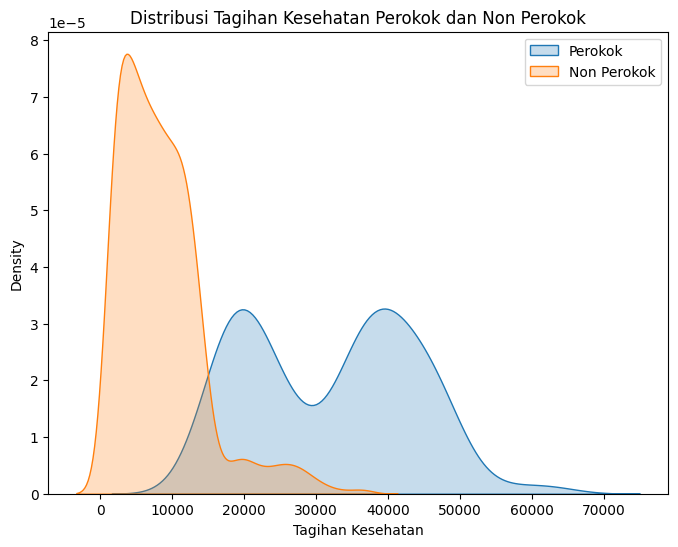

In [ ]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

tagihan_perokok = data[data['smoker'] == 'yes']['charges']
tagihan_nonperokok = data[data['smoker'] == 'no']['charges']

t_statistic, p_value = stats.ttest_ind(tagihan_perokok, tagihan_nonperokok)
print("Hasil Uji T-Test:")
print("Nilai p-value:", p_value)

# Visualisasi distribusi tagihan perokok dan non perokok
plt.figure(figsize=(8, 6))
sns.kdeplot(tagihan_perokok, shade=True, label='Perokok')
sns.kdeplot(tagihan_nonperokok, shade=True, label='Non Perokok')
plt.xlabel('Tagihan Kesehatan')
plt.ylabel('Density')
plt.title('Distribusi Tagihan Kesehatan Perokok dan Non Perokok')
plt.legend()
plt.show()

Hasil Uji Chi-Square:
Nilai p-value: 0.006548143503580696


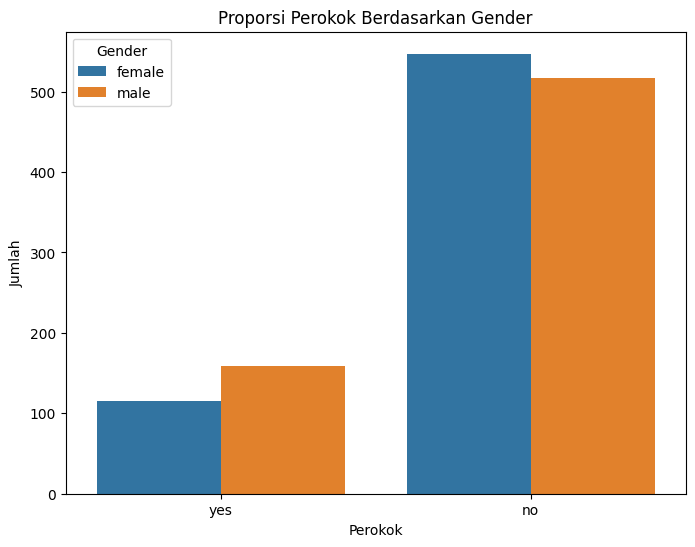

In [ ]:
# 2. Proporsi perokok laki-laki lebih besar dari perempuan

table = pd.crosstab(data['smoker'], data['sex'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(table)
print("Hasil Uji Chi-Square:")
print("Nilai p-value:", p_value)

# Visualisasi proporsi perokok berdasarkan gender
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=data)
plt.xlabel('Perokok')
plt.ylabel('Jumlah')
plt.title('Proporsi Perokok Berdasarkan Gender')
plt.legend(title='Gender')
plt.show()

In [ ]:
# 3. Variansi tagihan kesehatan perokok dan non perokok sama

f_statistic, p_value = stats.levene(tagihan_perokok, tagihan_nonperokok)
print("Hasil Uji Levene:")
print("Nilai p-value:", p_value)

Hasil Uji Levene:
Nilai p-value: 1.5593284881803726e-66


Hasil Uji T-Test:
Nilai p-value: 1.7916455594610296e-05


<ipython-input-31-66a45feded45>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tagihan_bmi_lebih25, shade=True, label='BMI > 25')
<ipython-input-31-66a45feded45>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tagihan_bmi_kurang25, shade=True, label='BMI < 25')


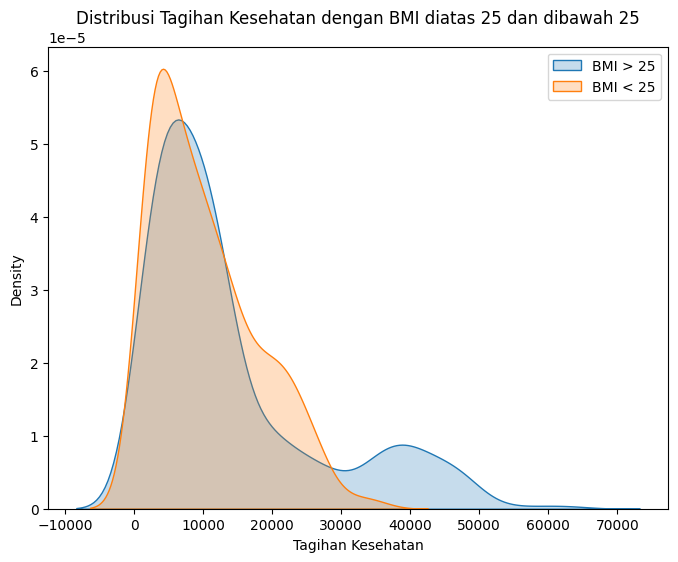

In [ ]:
# 4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

tagihan_bmi_lebih25 = data[data['bmi'] > 25]['charges']
tagihan_bmi_kurang25 = data[data['bmi'] < 25]['charges']

t_statistic, p_value = stats.ttest_ind(tagihan_bmi_lebih25, tagihan_bmi_kurang25)
print("Hasil Uji T-Test:")
print("Nilai p-value:", p_value)

# Visualisasi distribusi tagihan dengan BMI diatas 25 dan dibawah 25
plt.figure(figsize=(8, 6))
sns.kdeplot(tagihan_bmi_lebih25, shade=True, label='BMI > 25')
sns.kdeplot(tagihan_bmi_kurang25, shade=True, label='BMI < 25')
plt.xlabel('Tagihan Kesehatan')
plt.ylabel('Density')
plt.title('Distribusi Tagihan Kesehatan dengan BMI diatas 25 dan dibawah 25')
plt.legend()
plt.show()

Hasil Uji T-Test:
Nilai p-value: 0.03613272100592976


<ipython-input-32-a34f6e6f7c02>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tagihan_laki, shade=True, label='Laki-laki')
<ipython-input-32-a34f6e6f7c02>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tagihan_perempuan, shade=True, label='Perempuan')


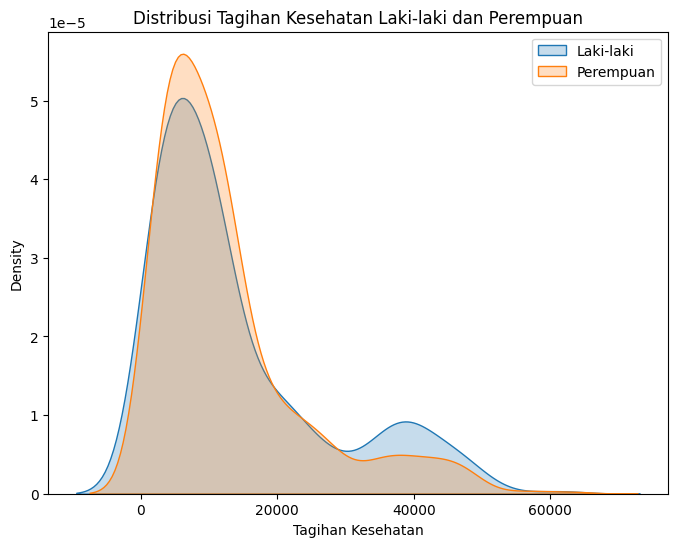

In [ ]:
# 5. Tagihan kesehatan laki-laki lebih besar dari perempuan

tagihan_laki = data[data['sex'] == 'male']['charges']
tagihan_perempuan = data[data['sex'] == 'female']['charges']

t_statistic, p_value = stats.ttest_ind(tagihan_laki, tagihan_perempuan)
print("Hasil Uji T-Test:")
print("Nilai p-value:", p_value)

# Visualisasi distribusi tagihan kesehatan laki-laki dan perempuan
plt.figure(figsize=(8, 6))
sns.kdeplot(tagihan_laki, shade=True, label='Laki-laki')
sns.kdeplot(tagihan_perempuan, shade=True, label='Perempuan')
plt.xlabel('Tagihan Kesehatan')
plt.ylabel('Density')
plt.title('Distribusi Tagihan Kesehatan Laki-laki dan Perempuan')
plt.legend()
plt.show()